We are looking at the paper titled "variational bayesian mixture of robust CCA models"
http://download.springer.com/static/pdf/362/chp%253A10.1007%252F978-3-642-15939-8_24.pdf?originUrl=http%3A%2F%2Flink.springer.com%2Fchapter%2F10.1007%2F978-3-642-15939-8_24&token2=exp=1489635010~acl=%2Fstatic%2Fpdf%2F362%2Fchp%25253A10.1007%25252F978-3-642-15939-8_24.pdf%3ForiginUrl%3Dhttp%253A%252F%252Flink.springer.com%252Fchapter%252F10.1007%252F978-3-642-15939-8_24*~hmac=37b8f08524063e3b92ac5e29a65bd5dd311385e9e9e28b8532d0e7990ed27580

In [1]:
import edward as ed
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
ed.set_seed(42)
%matplotlib inline

# DATA

In [2]:
def plot_result(X,Y):
    zero_class = np.where(Y[:, 0])
    one_class = np.where(Y[:, 1])
    plt.scatter(X[:, 0], X[:, 1], s=40, c='gray')
    plt.scatter(X[zero_class, 0], X[zero_class, 1], s=160, edgecolors='b',
                   facecolors='none', linewidths=2, label='Class 1')
    plt.scatter(X[one_class, 0], X[one_class, 1], s=80, edgecolors='orange',
                   facecolors='none', linewidths=2, label='Class 2')

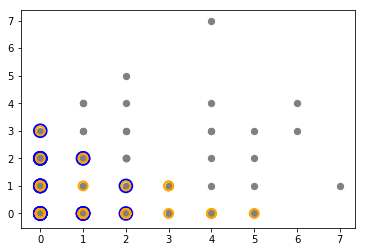

In [3]:
from sklearn.datasets import make_multilabel_classification
X, Y = make_multilabel_classification(n_classes=2, n_labels=1,
                                      allow_unlabeled=True,
                                      random_state=1)
plot_result(X,Y)

# The model

In [4]:
from edward.models import Normal,Gamma, WishartFull, StudentT,Multinomial

In [5]:
#set useful global variables
d1 = X.shape[1] #dimensionality of x
d2 = Y.shape[1] #dimensionality of y

In [6]:
# set the hyper parameters
a1 = 0.1
b1 = 0.1
a2 = 0.1
b2 = 0.1
gamma1 = d1 +1
gamma2 = d2 + 1
Phi1 = 100*np.eye(d1)
Phi2 = 100*np.eye(d2)
beta1 = 1
beta2 = 1

In [7]:
#equation 2

#the priors for the mean of the transformation
mu1 = Normal(mu = np.zeros((d1,1)), sigma = beta1*np.eye(d1),name = 'mu1')
mu2 = Normal(mu = np.zeros((d2,1)), sigma = beta2*np.eye(d2),name = 'mu2')

#the priors of the covariance transformation
Psi1 = WishartFull(df = gamma1, scale=Phi1,name = 'Psi1')
Psi2 = WishartFull(df = gamma2, scale=Phi2,name = 'Psi2')

#prior for alpha
alpha1 = []
for i in range(0,d1):
    alpha1.append(Gamma(alpha = a1,beta = b1,name = 'alpha1' + str(i)))

#distribution for w
#w = Normal(mu = np.zeros((d1,1)),sigma = alpha1)

In [10]:
alpha1[0]

<ed.RandomVariable 'alpha10/' shape=() dtype=tf.float32>

In [11]:
w = Normal(mu = 0.0,sigma = alpha1[0])